LEN 200
LEN 190
AVG: 390.394736842
STD 23.5344534378
W: 0.988360524178 
P: 0.122200958431
OK



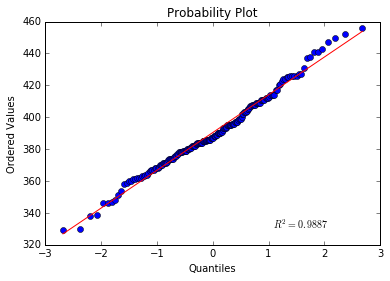

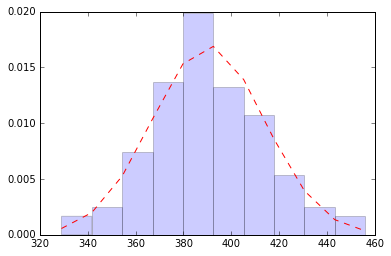

In [342]:
# coding: UTF-8
%matplotlib  inline
import random
from matplotlib import pyplot as plt
from scipy import genfromtxt
from scipy import stats
import numpy as np


d = np.loadtxt("../data/result0.csv", delimiter=",",skiprows=1,unpack=True,
               dtype=[('col1',int),('col2',int),('col3',"S10"),])
data = list(d[0])
data = sorted(data)
print "LEN", len(data)
data = data[2:-8]
print "LEN", len(data)
data = np.array(data)
plt.figure(0)
stats.probplot(data, dist="norm", plot=plt)

# 平均
avg = np.average(data)
print "AVG:", avg
std = np.std(data)
print "STD", std

# シャピロ=ウィルク検定
w, p = stats.shapiro(data)
print "W:", w, "\nP:", p
print "OK" if p > 0.05 else "BAD"

plt.figure(1)
n, x, patches = plt.hist(data, alpha=0.2,normed=1)
y = mlab.normpdf(x, avg, std)
plt.plot(x, y, 'r--')

print
# print x[list(y).index(max(y))]
DATA0 = data
AVG0 = avg
STD0 = std




LEN 200
LEN 183
LEN 163
AVG: 666.380368098
STD 63.6351957819
W: 0.985045671463 
P: 0.077262185514
OK



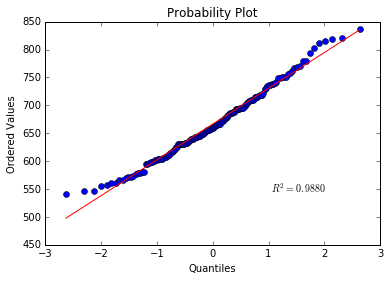

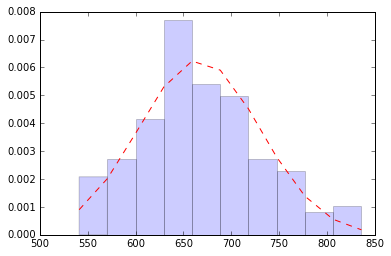

In [343]:
# coding: UTF-8
%matplotlib  inline
import random
from matplotlib import pyplot as plt
from scipy import genfromtxt
from scipy import stats
import numpy as np

# elapsedTime,questionType, question, expectedAnswer, Answer, isCorrect
d = np.loadtxt("../data/result1.csv", delimiter=",",skiprows=1,unpack=True,
               dtype=[('col1',int),('col2',int),('col3',"S10"),('col4',"S10"),('col5',"S10"),('col6',"S10")])

data = []
print "LEN", len(d[0])
for i, b in zip(d[0], d[5]):
    if b == "true":
        data.append(i)
# data = list(d[0])
data = sorted(data)
print "LEN", len(data)
data = data[4:-16]
print "LEN", len(data)
data = np.array(data)
plt.figure(0)
stats.probplot(data, dist="norm", plot=plt)

# 平均
avg = np.average(data)
print "AVG:", avg
std = np.std(data)
print "STD", std

# シャピロ=ウィルク検定
w, p = stats.shapiro(data)
print "W:", w, "\nP:", p
print "OK" if p > 0.05 else "BAD"


plt.figure(1)
n, x, patches = plt.hist(data, alpha=0.2,normed=1)
y = mlab.normpdf(x, avg, std)
plt.plot(x, y, 'r--')

print
# print x[list(y).index(max(y))]
DATA1 = data
AVG1 = avg
STD1 = std



LEN 100
LEN 94
AVG: 375.968085106
STD 23.3472637823
W: 0.980189621449 
P: 0.165059968829
OK



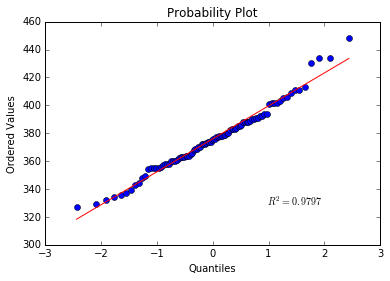

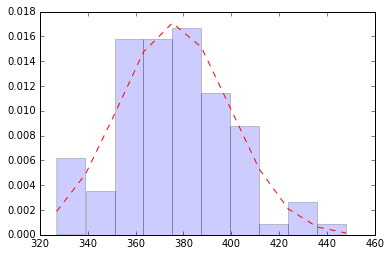

In [346]:
# coding: UTF-8
%matplotlib  inline
import random
from matplotlib import pyplot as plt, mlab as mlab
from scipy import genfromtxt
from scipy import stats
import numpy as np


d = np.loadtxt("../data/result0-1.csv", delimiter=",",skiprows=1,unpack=True,
               dtype=[('col1',int),('col2',int),('col3',"S10"),])
data = list(d[0])
data = sorted(data)
print "LEN", len(data)
data = data[2:-4]
print "LEN", len(data)
data = np.array(data)
plt.figure(0)
stats.probplot(data, dist="norm", plot=plt)

# 平均
avg = np.average(data)
print "AVG:", avg
std = np.std(data)
print "STD", std

# シャピロ=ウィルク検定
w, p = stats.shapiro(data)
print "W:", w, "\nP:", p
print "OK" if p > 0.05 else "BAD"

plt.figure(1)
n, x, patches = plt.hist(data, alpha=0.2,normed=1)
y = mlab.normpdf(x, avg, std)
plt.plot(x, y, 'r--')

print
DATA0 = data
AVG0 = avg
STD0 = std



375.968085106 666.380368098
a= 85.5558021146 
b= 290.412282992


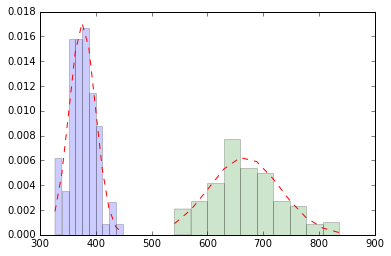

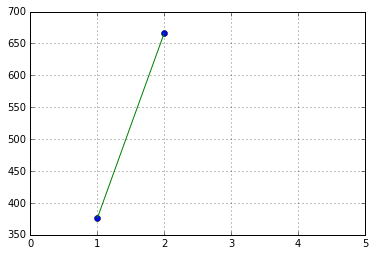

In [347]:
# coding: UTF-8
%matplotlib  inline
import random
from matplotlib import pyplot as plt
from scipy import genfromtxt
from scipy import stats
import numpy as np

plt.figure(0)
def draw(data, avg, std):
    n, x, patches = plt.hist(data, alpha=0.2,normed=1)
    y = mlab.normpdf(x, avg, std)
    plt.plot(x, y, 'r--')

draw(DATA0, AVG0, STD0)
draw(DATA1, AVG1, STD1)
print
print AVG0, AVG1


def least_square(xdata, ydata):
    # 最小二乗法
    def fit_func(param, x, y):
        # 一次関数で近似
        return y - (param[0] + param[1]*x)
    result = optimize.leastsq(fit_func, np.array([0., 0.]), args=(xdata,ydata))
    fit_a=result[0][0]
    fit_b=result[0][1]
    y = fit_a + fit_b*xdata
    plt.figure(1)
    plt.xlim([0,5])
    plt.plot(xdata, ydata, 'o')
    plt.plot(xdata, y, '-')
    plt.grid()
    print "a=", fit_a, "\nb=",fit_b

least_square(np.array([1,2]), np.array([AVG0, AVG1]))